# **Imports**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL
from keras import optimizers, losses
from keras.optimizers import *
import os
from keras import Sequential
from keras import layers
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Get & Preprocess Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/GP NTI/Train',
        target_size=(224, 224), batch_size=64,class_mode='categorical',shuffle=False)

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/GP NTI/Test',
            target_size=(224, 224), batch_size=64,class_mode='categorical',shuffle=False)


Found 3890 images belonging to 95 classes.
Found 1039 images belonging to 95 classes.


In [ ]:
train_path = "/content/drive/MyDrive/GP NTI/Train"
test_path = "/content/drive/MyDrive/GP NTI/Test"

In [ ]:
train_set.class_indices

{'100': 0,
 'Angry': 1,
 'Bury': 2,
 'among': 3,
 'ankh': 4,
 'aroura': 5,
 'at': 6,
 'bad thinking': 7,
 'bandage': 8,
 'bee': 9,
 'belong': 10,
 'birth': 11,
 'board game': 12,
 'book': 13,
 'boy': 14,
 'branch': 15,
 'bread': 16,
 'brewer': 17,
 'builder': 18,
 'canal': 19,
 'cloth on pole': 20,
 'cobra': 21,
 'composite_bow': 22,
 'cooked': 23,
 'corpse': 24,
 'dessert': 25,
 'divide': 26,
 'duck': 27,
 'elephant': 28,
 'enclosed mound': 29,
 'eye': 30,
 'fabric': 31,
 'face': 32,
 'falcon': 33,
 'fingre': 34,
 'fish': 35,
 'flail': 36,
 'folded': 37,
 'foot': 38,
 'galena': 39,
 'giraffe': 40,
 'he': 41,
 'her': 42,
 'hit': 43,
 'horn': 44,
 'king': 45,
 'leg': 46,
 'length of a human arm': 47,
 'life spirit': 48,
 'limits': 49,
 'lion': 50,
 'lizard': 51,
 'loaf': 52,
 'loaf of bread': 53,
 'man': 54,
 'mascot': 55,
 'meet': 56,
 'mother': 57,
 'mouth': 58,
 'musical instrument': 59,
 'nile fish': 60,
 'not': 61,
 'now': 62,
 'nurse': 63,
 'nursing': 64,
 'occur': 65,
 'one': 66,

In [ ]:
batch_size = 64
imageSize = 224

target_dims = (imageSize, imageSize, 3)
num_classes = 95

train_len = 3890
base_dir = os.path.join(os.getcwd(), "/content/drive/MyDrive/GP NTI")
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/GP NTI/Train')
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(imageSize, imageSize),
    batch_size=batch_size)
              

Found 3890 files belonging to 95 classes.
Using 3501 files for training.


In [ ]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.09,
    subset="validation",
    seed=123,
    image_size=(imageSize, imageSize),
    batch_size=batch_size)

Found 3890 files belonging to 95 classes.
Using 350 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.01,
    subset="validation",
    seed=123,
    image_size=(imageSize, imageSize),
    batch_size=batch_size)

Found 3890 files belonging to 95 classes.
Using 38 files for validation.


In [ ]:
test_set.class_indices

{'100': 0,
 'Her': 1,
 'Woman': 2,
 'among': 3,
 'angry': 4,
 'ankh': 5,
 'aroura': 6,
 'at': 7,
 'bad thinking': 8,
 'bandage': 9,
 'bee': 10,
 'belongs': 11,
 'birth': 12,
 'board game': 13,
 'book': 14,
 'boy': 15,
 'branch': 16,
 'bread': 17,
 'brewer': 18,
 'builder': 19,
 'bury': 20,
 'canal': 21,
 'cloth on pole': 22,
 'cobra': 23,
 'composite_bow': 24,
 'cooked': 25,
 'corpse': 26,
 'dessert': 27,
 'divide': 28,
 'duck': 29,
 'elephant': 30,
 'enclosed mound': 31,
 'eye': 32,
 'fabric': 33,
 'face': 34,
 'falcon': 35,
 'fingre': 36,
 'fish': 37,
 'flail': 38,
 'folded': 39,
 'foot': 40,
 'galena': 41,
 'giraffe': 42,
 'he': 43,
 'hit': 44,
 'horn': 45,
 'king': 46,
 'leg': 47,
 'length of a human arm': 48,
 'life spirit': 49,
 'limits': 50,
 'lion': 51,
 'lizard': 52,
 'loaf': 53,
 'loaf of bread': 54,
 'man': 55,
 'mascot': 56,
 'meet': 57,
 'mother': 58,
 'mouth': 59,
 'musical instrument': 60,
 'nile fish': 61,
 'not': 62,
 'now': 63,
 'nurse': 64,
 'nursing': 65,
 'occur': 

# **Build Model**

In [ ]:
from tensorflow.keras.applications import vgg16
vgg_conv = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
 # Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f7a70489590> False
<keras.layers.convolutional.Conv2D object at 0x7f79f1726f90> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef7ce990> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79ef6b5810> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef6b6f90> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef6bd7d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79ef6c0350> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef6c3c90> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef6cb310> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef6c3210> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79ef656410> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef65d8d0> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef662f10> False
<keras.layers.convolutional.Conv2D object at 0x7f79ef6c3b90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f79ef6b6f50>

In [ ]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Create the the model
model = Sequential()
# Add the vgg16 convolutional base model
model.add(vgg_conv)

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

In [ ]:
vgg_conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(95, activation='softmax'))
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 95)                97375     
                                                                 
Total params: 40,503,199
Trainable params: 25,788,511
Non-trainable params: 14,714,688
_________________________________________________________________


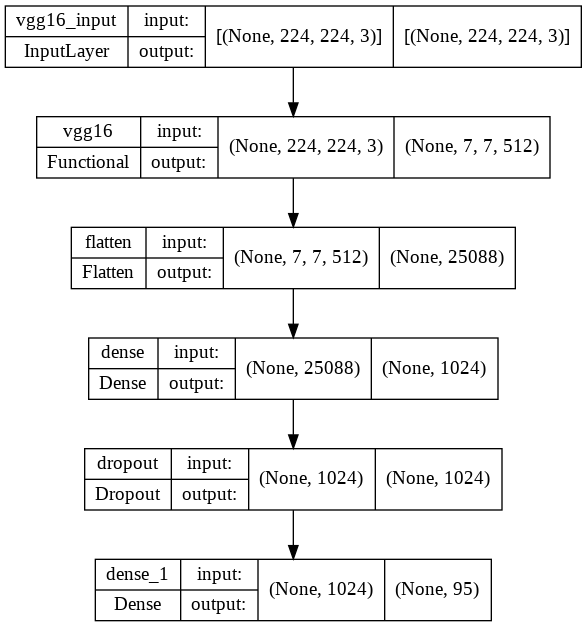

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model= model , show_shapes=True)

**Compile Model:**

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['acc'])

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

annealer = ReduceLROnPlateau(monitor='acc', factor=0.5, patience=3, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('/temp/{epoch}_VGG16.h5', verbose=1, save_best_only=False, mode='auto', save_freq='epoch')

**Train Model**

In [ ]:
history = model.fit(
                  train_ds,
                  validation_data=validation_ds,
                  epochs=25,
                  batch_size=64,
                  callbacks=[annealer, checkpoint],
                  steps_per_epoch=len(train_ds),
                  validation_steps=len(test_ds)
                )

Epoch 1/25
55/55 [==============================] - ETA: 0s - loss: 8.9926 - acc: 0.2348
Epoch 1: saving model to /temp/1_VGG16.h5
55/55 [==============================] - 678s 10s/step - loss: 8.9926 - acc: 0.2348 - val_loss: 1.6618 - val_acc: 0.6406 - lr: 0.0010
Epoch 2/25
55/55 [==============================] - ETA: 0s - loss: 1.7562 - acc: 0.5687
Epoch 2: saving model to /temp/2_VGG16.h5
55/55 [==============================] - 22s 376ms/step - loss: 1.7562 - acc: 0.5687 - val_loss: 0.6456 - val_acc: 0.8125 - lr: 0.0010
Epoch 3/25
55/55 [==============================] - ETA: 0s - loss: 1.0095 - acc: 0.7509
Epoch 3: saving model to /temp/3_VGG16.h5
55/55 [==============================] - 21s 367ms/step - loss: 1.0095 - acc: 0.7509 - val_loss: 0.7572 - val_acc: 0.8125 - lr: 0.0010
Epoch 4/25
55/55 [==============================] - ETA: 0s - loss: 0.7815 - acc: 0.8061
Epoch 4: saving model to /temp/4_VGG16.h5
55/55 [==============================] - 22s 372ms/step - loss: 0.7815 -

# **Plotting**

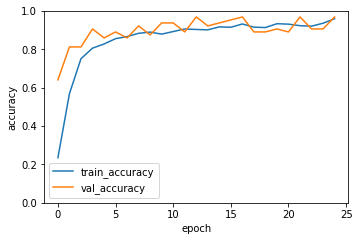

In [ ]:
# Plotting Loss & Accuracy Graphs
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['acc'], label = 'train_accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.legend()
plt.show()

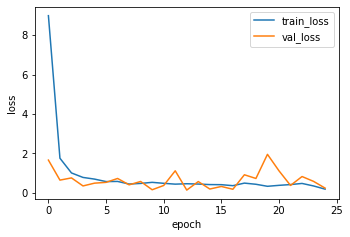

In [ ]:
# Plotting Loss & Accuracy Graphs
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# **Evaluate**

In [ ]:
model.evaluate(test_ds)

1/1 [==============================] - 3s 3s/step - loss: 0.2835 - acc: 0.9211


[0.2834939658641815, 0.9210526347160339]

In [ ]:
model.evaluate(train_ds)

55/55 [==============================] - 19s 323ms/step - loss: 0.0051 - acc: 0.9980


[0.005063485354185104, 0.9980005621910095]

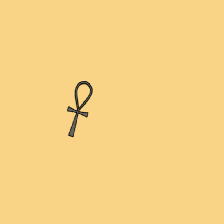

In [ ]:
from keras.preprocessing import image
img1 =image.load_img('/content/drive/MyDrive/GP NTI/Test/ankh/ankh (42).jpg',target_size =(224,224))
img1

# **Prediction**

In [ ]:
y_pred=model.predict(test_ds)
y_pred.shape

(38, 95)

In [ ]:
class_names = train_ds.class_names
actual = []
pred = []
for images, labels in test_ds:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = model.predict(image)
        pred.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

In [ ]:
count=0
for i in range(len(actual)):
    if actual[i]==pred[i]:
        count+=1

print("Accuracy on test data is: ",(count/len(actual))*100)

Accuracy on test data is:  92.10526315789474
